<a href="https://colab.research.google.com/github/santiagoviteri01/mmia_nlp_final_project/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install textdistance

In [ ]:
pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 1.8 MB/s eta 0:00:00


In [ ]:
!pip install pytorch_lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 866.2/866.2 kB 16.1 MB/s eta 0:00:00


## Data Processing

In [ ]:
from google.colab import drive
import os
import pandas as pd
drive.mount('/content/drive')
import unicodedata
import string

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from unidecode import unidecode
import os
import pandas as pd
import unicodedata
import string
import re
from unidecode import unidecode
import textdistance


In [ ]:
all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

def normalize_name(name):
    return unidecode(name).lower().strip()

def dataframes_from_csv(folder_path,code_1,code_2):
    # Read players_raw.csv
    file = "players_raw.csv"
    file_path = os.path.join(folder_path, file)
    df_2 = pd.read_csv(file_path, sep=",", encoding=code_2)
    #df_2.info()


    # Clean and normalize names in df_2
    df_2['first_name'] = df_2['first_name'].str.strip().str.lower()
    df_2['second_name'] = df_2['second_name'].str.strip().str.lower()
    df_2['name'] = df_2['first_name'] + ' ' + df_2['second_name']
    df_2['name'] = df_2['name'].replace('_', ' ')
    df_2['name'] = df_2['name'].apply(normalize_name)
    df_2['name'] = df_2['name'].str.strip().str.lower()

    return df_2


In [ ]:
folder_path = "/content/drive/MyDrive/fpl/2016-2017"
code_1="latin-1"
code_2="utf-8"
df_1_2016_2017 = dataframes_from_csv(folder_path,code_1,code_2)

In [ ]:
df_1_2016_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 58 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   assists                       683 non-null    int64  
 1   bonus                         683 non-null    int64  
 2   bps                           683 non-null    int64  
 3   chance_of_playing_next_round  550 non-null    float64
 4   chance_of_playing_this_round  549 non-null    float64
 5   clean_sheets                  683 non-null    int64  
 6   code                          683 non-null    int64  
 7   cost_change_event             683 non-null    int64  
 8   cost_change_event_fall        683 non-null    int64  
 9   cost_change_start             683 non-null    int64  
 10  cost_change_start_fall        683 non-null    int64  
 11  creativity                    683 non-null    float64
 12  dreamteam_count               683 non-null    int64  
 13  ea_in

In [ ]:
folder_path = "/content/drive/MyDrive/fpl/2017-2018"
code_1="latin-1"
code_2="utf-8"
df_1_2017_2018 = dataframes_from_csv(folder_path,code_1,code_2) #pierreemile hojbjerg

In [ ]:
df_1_2017_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 59 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   assists                       647 non-null    int64  
 1   bonus                         647 non-null    int64  
 2   bps                           647 non-null    int64  
 3   chance_of_playing_next_round  514 non-null    float64
 4   chance_of_playing_this_round  514 non-null    float64
 5   clean_sheets                  647 non-null    int64  
 6   code                          647 non-null    int64  
 7   cost_change_event             647 non-null    int64  
 8   cost_change_event_fall        647 non-null    int64  
 9   cost_change_start             647 non-null    int64  
 10  cost_change_start_fall        647 non-null    int64  
 11  creativity                    647 non-null    float64
 12  dreamteam_count               647 non-null    int64  
 13  ea_in

In [ ]:
folder_path = "/content/drive/MyDrive/fpl/2018-2019"
code_1="latin-1"
code_2="utf-8"
df_1_2018_2019 = dataframes_from_csv(folder_path,code_1,code_2)
df_1_2018_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 59 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   assists                       624 non-null    int64  
 1   bonus                         624 non-null    int64  
 2   bps                           624 non-null    int64  
 3   chance_of_playing_next_round  494 non-null    float64
 4   chance_of_playing_this_round  494 non-null    float64
 5   clean_sheets                  624 non-null    int64  
 6   code                          624 non-null    int64  
 7   cost_change_event             624 non-null    int64  
 8   cost_change_event_fall        624 non-null    int64  
 9   cost_change_start             624 non-null    int64  
 10  cost_change_start_fall        624 non-null    int64  
 11  creativity                    624 non-null    float64
 12  dreamteam_count               624 non-null    int64  
 13  ea_in

In [ ]:
folder_path = "/content/drive/MyDrive/fpl/2019-2020"
code_1="utf-8"
code_2="utf-8"
df_1_2019_2020 = dataframes_from_csv(folder_path,code_1,code_2)
df_1_2019_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 62 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   assists                       666 non-null    int64  
 1   bonus                         666 non-null    int64  
 2   bps                           666 non-null    int64  
 3   chance_of_playing_next_round  523 non-null    float64
 4   chance_of_playing_this_round  523 non-null    float64
 5   clean_sheets                  666 non-null    int64  
 6   code                          666 non-null    int64  
 7   cost_change_event             666 non-null    int64  
 8   cost_change_event_fall        666 non-null    int64  
 9   cost_change_start             666 non-null    int64  
 10  cost_change_start_fall        666 non-null    int64  
 11  creativity                    666 non-null    float64
 12  creativity_rank               666 non-null    int64  
 13  creat

In [ ]:
folder_path = "/content/drive/MyDrive/fpl/2020-2021"
code_1="utf-8"
code_2="utf-8"
df_1_2020_2021 = dataframes_from_csv(folder_path,code_1,code_2)
df_1_2020_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 68 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   assists                               713 non-null    int64  
 1   bonus                                 713 non-null    int64  
 2   bps                                   713 non-null    int64  
 3   chance_of_playing_next_round          529 non-null    float64
 4   chance_of_playing_this_round          528 non-null    float64
 5   clean_sheets                          713 non-null    int64  
 6   code                                  713 non-null    int64  
 7   corners_and_indirect_freekicks_order  100 non-null    float64
 8   corners_and_indirect_freekicks_text   0 non-null      float64
 9   cost_change_event                     713 non-null    int64  
 10  cost_change_event_fall                713 non-null    int64  
 11  cost_change_start  

In [ ]:
folder_path = "/content/drive/MyDrive/fpl/2021-2022"
code_1="utf-8"
code_2="utf-8"
df_1_2021_2022 = dataframes_from_csv(folder_path,code_1,code_2)
df_1_2021_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737 entries, 0 to 736
Data columns (total 68 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   assists                               737 non-null    int64  
 1   bonus                                 737 non-null    int64  
 2   bps                                   737 non-null    int64  
 3   chance_of_playing_next_round          572 non-null    float64
 4   chance_of_playing_this_round          572 non-null    float64
 5   clean_sheets                          737 non-null    int64  
 6   code                                  737 non-null    int64  
 7   corners_and_indirect_freekicks_order  86 non-null     float64
 8   corners_and_indirect_freekicks_text   0 non-null      float64
 9   cost_change_event                     737 non-null    int64  
 10  cost_change_event_fall                737 non-null    int64  
 11  cost_change_start  

In [ ]:
folder_path = "/content/drive/MyDrive/fpl/2022-2023"
code_1="utf-8"
code_2="utf-8"
df_1_2022_2023 = dataframes_from_csv(folder_path,code_1,code_2)
df_1_2022_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 89 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   assists                               778 non-null    int64  
 1   bonus                                 778 non-null    int64  
 2   bps                                   778 non-null    int64  
 3   chance_of_playing_next_round          592 non-null    float64
 4   chance_of_playing_this_round          592 non-null    float64
 5   clean_sheets                          778 non-null    int64  
 6   clean_sheets_per_90                   778 non-null    float64
 7   code                                  778 non-null    int64  
 8   corners_and_indirect_freekicks_order  77 non-null     float64
 9   corners_and_indirect_freekicks_text   0 non-null      float64
 10  cost_change_event                     778 non-null    int64  
 11  cost_change_event_f

In [ ]:
folder_path = "/content/drive/MyDrive/fpl/2023-2024"
code_1="utf-8"
code_2="utf-8"
df_1_2023_2024 = dataframes_from_csv(folder_path,code_1,code_2)
df_1_2023_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 865 entries, 0 to 864
Data columns (total 89 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   assists                               865 non-null    int64  
 1   bonus                                 865 non-null    int64  
 2   bps                                   865 non-null    int64  
 3   chance_of_playing_next_round          657 non-null    float64
 4   chance_of_playing_this_round          657 non-null    float64
 5   clean_sheets                          865 non-null    int64  
 6   clean_sheets_per_90                   865 non-null    float64
 7   code                                  865 non-null    int64  
 8   corners_and_indirect_freekicks_order  74 non-null     float64
 9   corners_and_indirect_freekicks_text   0 non-null      float64
 10  cost_change_event                     865 non-null    int64  
 11  cost_change_event_f

In [ ]:
# Combine all the DataFrames into a single DataFrame
df_combined = pd.concat([df_1_2016_2017, df_1_2017_2018, df_1_2018_2019, df_1_2019_2020, df_1_2020_2021, df_1_2021_2022, df_1_2022_2023, df_1_2023_2024], ignore_index=True)


In [ ]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5713 entries, 0 to 5712
Data columns (total 94 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   assists                               5713 non-null   int64  
 1   bonus                                 5713 non-null   int64  
 2   bps                                   5713 non-null   int64  
 3   chance_of_playing_next_round          4431 non-null   float64
 4   chance_of_playing_this_round          4429 non-null   float64
 5   clean_sheets                          5713 non-null   int64  
 6   code                                  5713 non-null   int64  
 7   cost_change_event                     5713 non-null   int64  
 8   cost_change_event_fall                5713 non-null   int64  
 9   cost_change_start                     5713 non-null   int64  
 10  cost_change_start_fall                5713 non-null   int64  
 11  creativity       

## Quick EDA

### Wordcloud

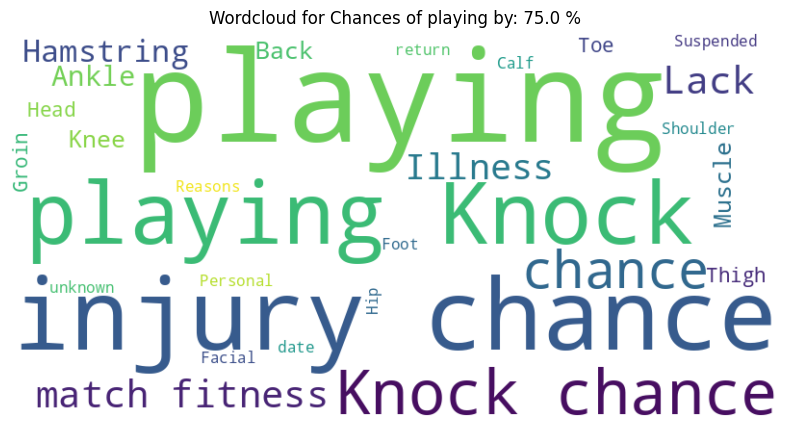

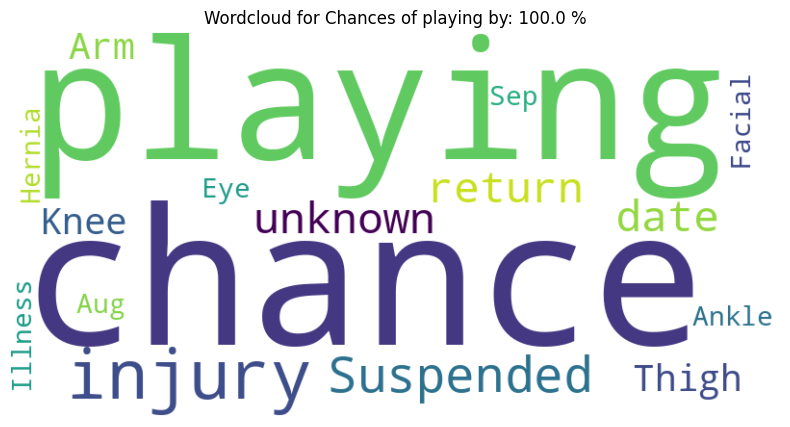

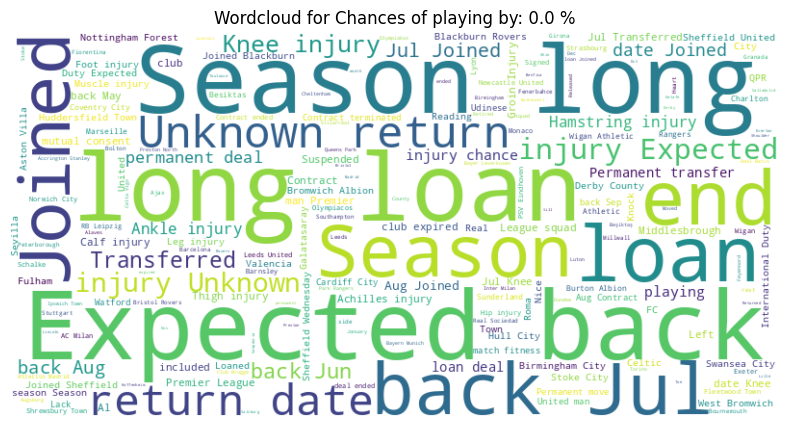

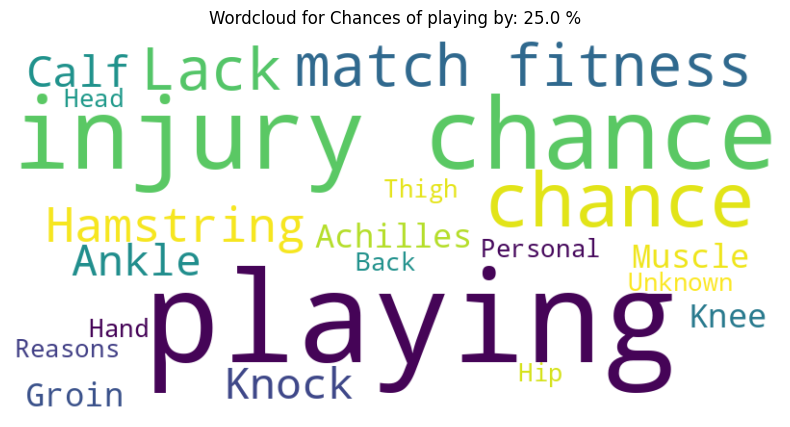

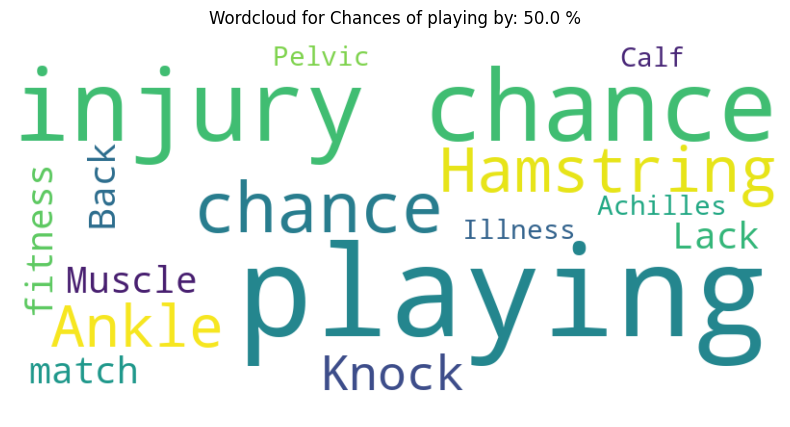

In [198]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
df=df_1
variable="chance_of_playing_this_round"
def plot_wordcloud(texts, title):
    texts = [str(text) for text in texts]
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(texts))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()
df_1[variable].unique()

percents=df_1[variable].unique()
for sentiment in percents:
    texts = df[df[variable] == sentiment]['news']
    plot_wordcloud(texts, f'Wordcloud for Chances of playing by: {sentiment} %')
    print("     ")

### Histogram

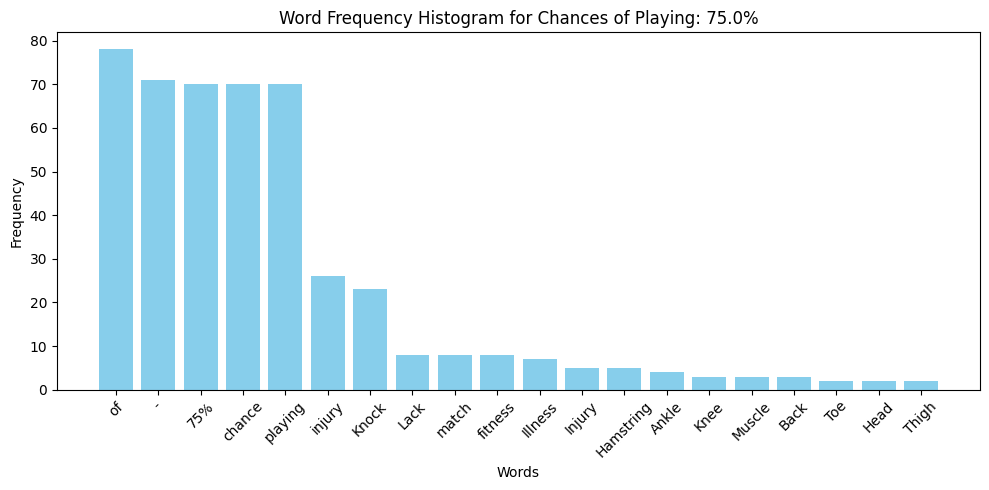

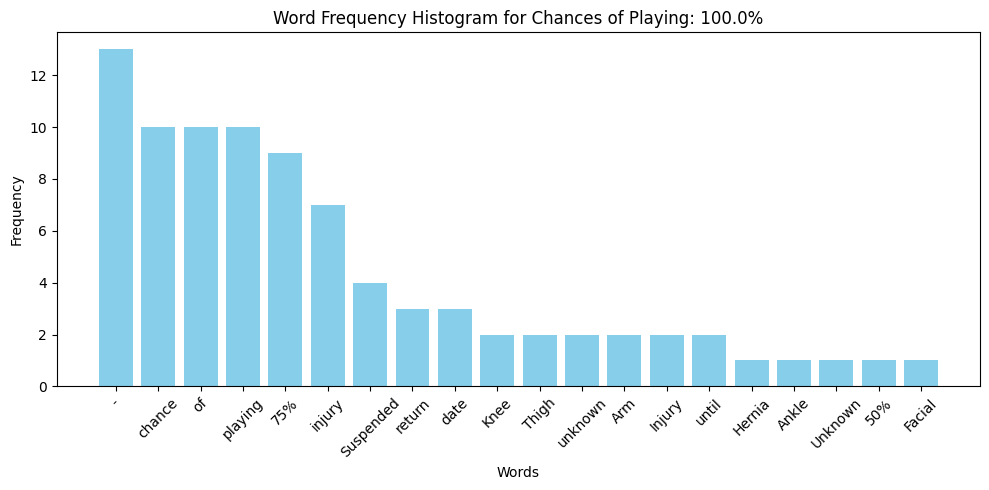

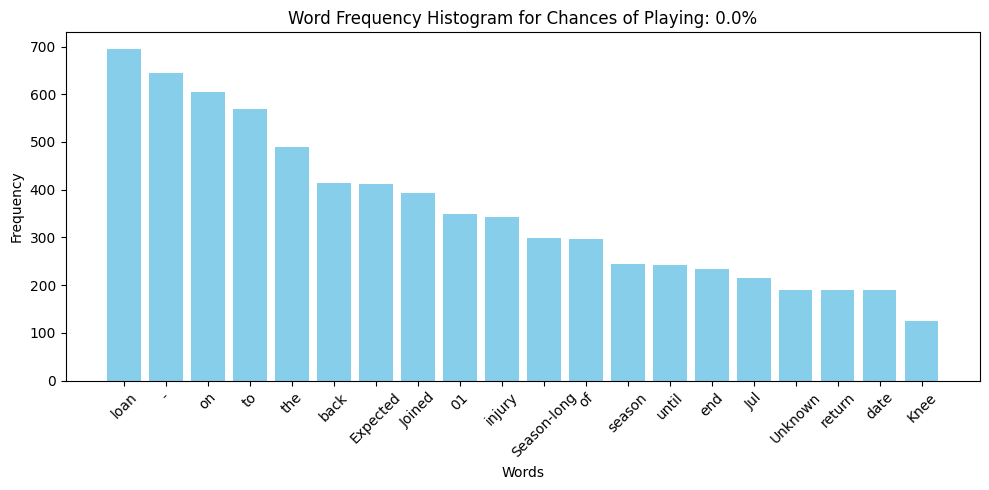

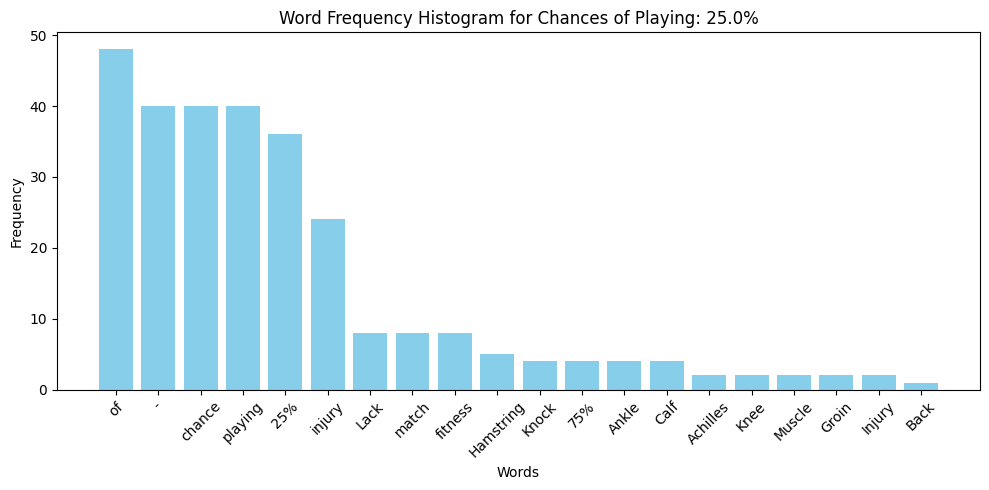

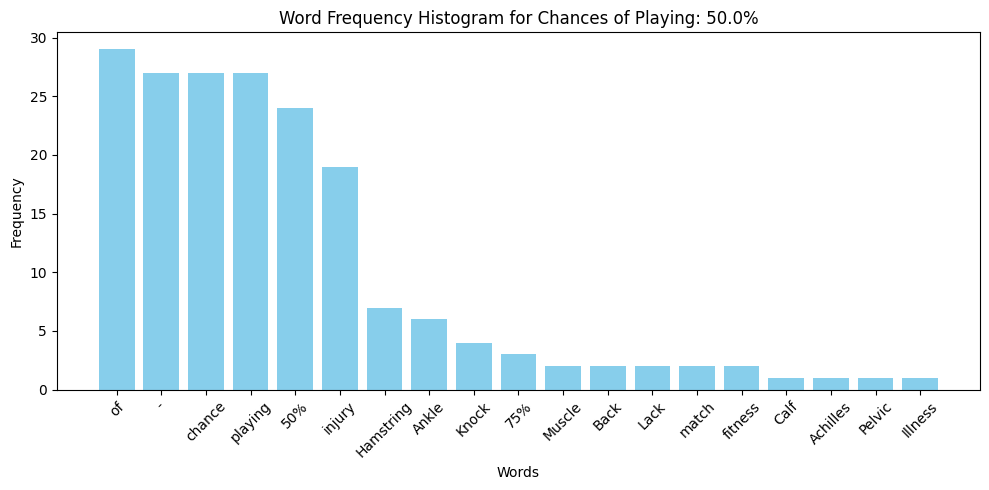

In [197]:
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

# Define the DataFrame and variable
df = df_1
variable = "chance_of_playing_this_round"

# Function to plot a histogram of word frequencies
def plot_word_histogram(texts, title):
    # Split the texts into words
    words = ' '.join([str(text) for text in texts]).split()

    # Count word frequencies
    word_counts = Counter(words)

    # Get the most common words and their counts
    most_common_words = word_counts.most_common(20)  # You can adjust the number of top words to show

    # Create a DataFrame for easy plotting
    word_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

    # Plot the histogram
    plt.figure(figsize=(10, 5))
    plt.bar(word_df['Word'], word_df['Frequency'], color='skyblue')
    plt.xticks(rotation=45)
    plt.title(title)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Get the unique values of the variable
percents = df[variable].unique()

# Loop through each category and plot the histogram
for sentiment in percents:
    texts = df[df[variable] == sentiment]['news']
    plot_word_histogram(texts, f'Word Frequency Histogram for Chances of Playing: {sentiment}%')
    print("         ")


## Dataset Definition

In [ ]:
df_1 = df_combined.copy()  # If you want to preserve the original dataframe

# Drop rows where 'chance_of_playing_this_round' has NaN values
df_1=df_1.dropna(subset=['chance_of_playing_this_round'])

# Fill NaN values in the 'news' column with 'no news'
#df_1['news']=df_1['news'].fillna('no news')
df_1=df_1.dropna(subset=['news'])

# Check the DataFrame info to verify the changes
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1656 entries, 2 to 5710
Data columns (total 94 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   assists                               1656 non-null   int64  
 1   bonus                                 1656 non-null   int64  
 2   bps                                   1656 non-null   int64  
 3   chance_of_playing_next_round          1656 non-null   float64
 4   chance_of_playing_this_round          1656 non-null   float64
 5   clean_sheets                          1656 non-null   int64  
 6   code                                  1656 non-null   int64  
 7   cost_change_event                     1656 non-null   int64  
 8   cost_change_event_fall                1656 non-null   int64  
 9   cost_change_start                     1656 non-null   int64  
 10  cost_change_start_fall                1656 non-null   int64  
 11  creativity            

In [ ]:
X = df_1['news'].values
y = df_1['chance_of_playing_this_round'].values

In [ ]:
X[26]

'Ankle injury - Unknown return date'

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
import torch
from torch.utils.data import Dataset, DataLoader

In [ ]:
folder_path = '/content/drive/MyDrive/'
file_name = 'glove.6B.100d.txt'
file_path = os.path.join(folder_path, file_name)


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk

In [ ]:
import zipfile
import os
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
from collections import Counter
import re
import pytorch_lightning as pl
import numpy as np

# Define the Dataset
class SentimentDataset(Dataset):
    def __init__(self, texts, labels, vocab, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.vocab = vocab
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts.iloc[idx]
        label = self.labels.iloc[idx]
        tokens = self.tokenizer(text)
        indices = torch.tensor([self.vocab.get(token, self.vocab['<unk>']) for token in tokens], dtype=torch.long)
        if len(indices) < self.max_len:
            indices = torch.cat([indices, torch.zeros(self.max_len - len(indices), dtype=torch.long)])
        else:
            indices = indices[:self.max_len]
        return indices, torch.tensor(label, dtype=torch.long)

# Tokenizer and Vocabulary
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# Initialize the PorterStemmer
stemmer = PorterStemmer()

def nltk_tokenizer(text):
    """Tokenizes input text, filters out numeric tokens, and applies stemming."""
    if isinstance(text, str):
        tokens = word_tokenize(text.lower())
        # Filter out tokens that are numeric and stem the remaining tokens
        #tokens = [stemmer.stem(token) for token in tokens if not token.isdigit()]
        return tokens
    return []


def build_vocab(texts):
    """Builds vocabulary from a list of texts, excluding numeric tokens."""
    counter = Counter()
    for text in texts:
        tokens = nltk_tokenizer(text)
        counter.update(tokens)

    # Create vocabulary with an index starting from 1
    vocab = {token: i + 1 for i, (token, _) in enumerate(counter.items())}
    vocab['<unk>'] = len(vocab) + 1  # Add unknown token

    return vocab


def load_pretrained_embeddings(embedding_file, vocab, embed_dim):
    embeddings_index = {}
    with open(embedding_file, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs

    embedding_matrix = np.zeros((len(vocab) + 1, embed_dim))
    for word, i in vocab.items():
        if i < len(embedding_matrix):
            embedding_vector = embeddings_index.get(word)
            if embedding_vector is not None:
                embedding_matrix[i] = embedding_vector

    return torch.tensor(embedding_matrix, dtype=torch.float32)




# DataModule
# Define the DataModule
class SentimentDataModule(pl.LightningDataModule):
    def __init__(self, train_texts, train_labels, val_texts, val_labels, test_texts, test_labels, vocab, tokenizer, max_len, batch_size):
        super().__init__()
        self.train_texts = train_texts
        self.train_labels = train_labels
        self.val_texts = val_texts
        self.val_labels = val_labels
        self.test_texts = test_texts
        self.test_labels = test_labels
        self.vocab = vocab
        self.tokenizer = tokenizer
        self.max_len = max_len
        self.batch_size = batch_size

    def setup(self, stage=None):
        self.train_dataset = SentimentDataset(self.train_texts, self.train_labels, self.vocab, self.tokenizer, self.max_len)
        self.val_dataset = SentimentDataset(self.val_texts, self.val_labels, self.vocab, self.tokenizer, self.max_len)
        self.test_dataset = SentimentDataset(self.test_texts, self.test_labels, self.vocab, self.tokenizer, self.max_len)

    def train_dataloader(self):
        return DataLoader(self.train_dataset, batch_size=self.batch_size, shuffle=True, collate_fn=self.collate_fn)

    def val_dataloader(self):
        return DataLoader(self.val_dataset, batch_size=self.batch_size, collate_fn=self.collate_fn)

    def test_dataloader(self):
        return DataLoader(self.test_dataset, batch_size=self.batch_size, collate_fn=self.collate_fn)

    def collate_fn(self, batch):
        texts, labels = zip(*batch)
        texts = pad_sequence(texts, batch_first=True, padding_value=0)
        targets = torch.tensor(labels, dtype=torch.float32) # Convert targets to float
        return texts, targets

# Example data split (assuming X and y are your text and label DataFrames)
from sklearn.model_selection import train_test_split

# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y/100, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

# Build vocab and instantiate DataModule
vocab = build_vocab(X_train)
vocab_size = len(vocab)
embed_dim = 100
max_len = 10
batch_size = 32
pretrained_embeddings = load_pretrained_embeddings(file_path, vocab, embed_dim)

data_module = SentimentDataModule(
    train_texts=pd.DataFrame(X_train),
    train_labels=pd.DataFrame(y_train),
    val_texts=pd.DataFrame(X_val),
    val_labels=pd.DataFrame(y_val),
    test_texts=pd.DataFrame(X_test),
    test_labels=pd.DataFrame(y_test),
    vocab=vocab,
    tokenizer=nltk_tokenizer,
    max_len=10,
    batch_size=batch_size
)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


(1324,)
(166,)
(166,)


In [ ]:
vocab

{'knee': 1,
 'injury': 2,
 '-': 3,
 'expected': 4,
 'back': 5,
 '07': 6,
 'sep': 7,
 'joined': 8,
 'vfl': 9,
 'osnabruck': 10,
 'on': 11,
 'a': 12,
 'permanent': 13,
 'deal': 14,
 '1/2': 15,
 'bayern': 16,
 'munich': 17,
 '3/7': 18,
 'season-long': 19,
 'loan': 20,
 'to': 21,
 'crewe': 22,
 'alexandra': 23,
 'compassionate': 24,
 'leave': 25,
 '.': 26,
 'unknown': 27,
 'return': 28,
 'date': 29,
 'deportivo': 30,
 'la': 31,
 'coruna': 32,
 'for': 33,
 'the': 34,
 'season': 35,
 'walsall': 36,
 'inter': 37,
 'milan': 38,
 '17/1': 39,
 '75': 40,
 '%': 41,
 'chance': 42,
 'of': 43,
 'playing': 44,
 'luton': 45,
 'town': 46,
 'until': 47,
 'end': 48,
 '01': 49,
 'jul': 50,
 'contract': 51,
 'cancelled': 52,
 'by': 53,
 'mutual': 54,
 'consent': 55,
 'hamstring': 56,
 'jun': 57,
 'ankle': 58,
 '50': 59,
 'returned': 60,
 'everton': 61,
 'where': 62,
 'expired': 63,
 '30/06': 64,
 'knock': 65,
 'transfer': 66,
 'galatasaray': 67,
 'ipswich': 68,
 '30/7': 69,
 'aug': 70,
 '18': 71,
 'month': 

# Models

## RNNs NLP Models

In [ ]:
import pytorch_lightning as pl
import torch
import torch.nn as nn
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


class SentimentModel(pl.LightningModule):
    def __init__(self, vocab_size, embed_dim, hidden_dim, output_dim, rnn_type='RNN', bidirectional=False):
        super(SentimentModel, self).__init__()
        #self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.embedding=nn.Embedding.from_pretrained(pretrained_embeddings, freeze=False)

        # Determine the RNN type and set bidirectional flag
        if rnn_type == 'RNN':
            self.rnn = nn.RNN(embed_dim, hidden_dim, batch_first=True, bidirectional=bidirectional)
        elif rnn_type == 'LSTM':
            self.rnn = nn.LSTM(embed_dim, hidden_dim, batch_first=True, bidirectional=bidirectional)
        elif rnn_type == 'GRU':
            self.rnn = nn.GRU(embed_dim, hidden_dim, batch_first=True, bidirectional=bidirectional)
        else:
            raise ValueError(f"Unsupported RNN type: {rnn_type}")

        # The output dimension of the RNN layer is doubled for bidirectional RNNs
        rnn_output_dim = hidden_dim * 2 if bidirectional else hidden_dim
        self.fc = nn.Linear(rnn_output_dim, output_dim)
        self.loss_fn = nn.MSELoss()
        self.y_true = []
        self.y_pred = []

        # Initialize lists to store loss values
        self.train_losses = []
        self.val_losses = []

    def forward(self, x):
        x = self.embedding(x)
        output, _ = self.rnn(x)
        # Use the output of the last time step
        output = self.fc(output[:, -1, :])
        return output

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = self.loss_fn(y_hat.squeeze(), y.squeeze())
        self.log('train_loss', loss, on_step=False, on_epoch=True)  # Log the training loss
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = self.loss_fn(y_hat.squeeze(), y.squeeze())
        self.log('val_loss', loss, on_step=False, on_epoch=True)  # Log the validation loss
        return loss

    def test_step(self, batch, batch_idx):
        x, y = batch
        self.eval()
        with torch.no_grad():
            outputs = self(x)
            self.y_true.extend(y.cpu().numpy())
            self.y_pred.extend(outputs.cpu().numpy())

    def on_epoch_end(self):
        # Ensure to collect and store the average losses
        train_loss = self.trainer.callback_metrics.get('train_loss')
        val_loss = self.trainer.callback_metrics.get('val_loss')

        # Debugging output
        if train_loss is not None:
            self.train_losses.append(train_loss.item())
        else:
            print("Training loss not found. Check if it's being logged correctly.")

        if val_loss is not None:
            self.val_losses.append(val_loss.item())
        else:
            print("Validation loss not found. Check if it's being logged correctly.")

    def on_test_epoch_end(self):
        mse = mean_squared_error(self.y_true, self.y_pred)
        mae = mean_absolute_error(self.y_true, self.y_pred)
        #r2 = r2_score(self.y_true, self.y_pred)  # R² metric

        # Log metrics to PyTorch Lightning logger
        self.log('test_mse', mse)
        self.log('test_mae', mae)
        #self.log('test_r2', r2)  # Log R² score

        # Print metrics for visibility
        print(f'Mean Squared Error: {mse}')
        print(f'Mean Absolute Error: {mae}')
        #print(f'R² Score: {r2}')  # Print R² score


    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=0.0001)


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /content/checkpoints exists and is not empty.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type      | Params | Mode 
------------------------------------------------
0 | embedding | Embedding | 69.1 K | train
1 | rnn       | LSTM      | 85.0 K | train
2 | fc        | Linear    | 129    | train
3 | loss_fn   | MSELoss   | 0      | train
------------------------------------------------
154 K     Trainable params
0         Non-trainable params
154 K     Total params
0.617     Total estimated model params size (MB)
4         Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (42) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

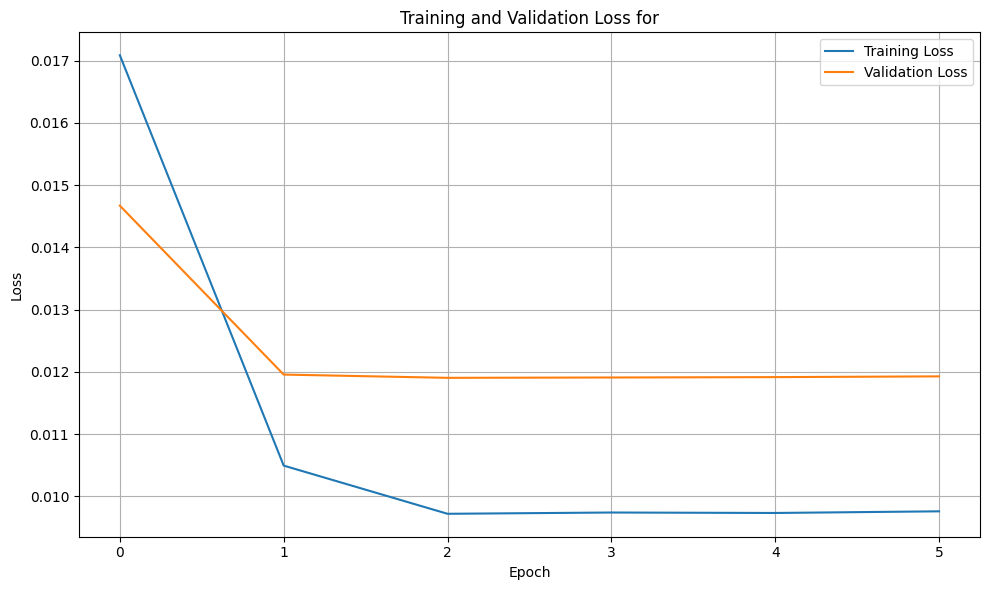

In [ ]:
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import CSVLogger  # Import CSVLogger
from pytorch_lightning.callbacks import ModelCheckpoint, EarlyStopping

# Supongamos que tienes un DataModule definido como `data_module`
# y un vocab_size definido

# Define and train RNN model
rnn_model = SentimentModel(vocab_size=len(vocab), embed_dim=100, hidden_dim=64, output_dim=1, rnn_type='LSTM', bidirectional=True)

# Setup logger
logger = CSVLogger(save_dir="logs", name="sentiment_model")

# Setup early stopping callback
early_stopping_callback = EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    patience=3,          # Number of epochs to wait for improvement
    mode='min',          # Mode to optimize (minimize in this case)
    verbose=False         # Print messages when early stopping is triggered
)

# Setup checkpoint callback
checkpoint_callback = ModelCheckpoint(
    monitor='val_loss',  # Metric to monitor
    dirpath='checkpoints',
    filename='best_model-{epoch:02d}-{val_loss:.2f}',
    save_top_k=1,
    mode='min',          # Mode to optimize (minimize in this case)
    verbose=False
)

# Setup Trainer
trainer = pl.Trainer(
    max_epochs=200,
    devices=1 if torch.cuda.is_available() else "auto",
    logger=logger,
    callbacks=[early_stopping_callback, checkpoint_callback]  # Add callbacks here
)

# Train the model
trainer.fit(rnn_model, datamodule=data_module)

# Save the model
trainer.save_checkpoint("rnn_model.ckpt")

def load_and_plot_metrics(log_dir):
    # Load metrics CSV

    metrics = pd.read_csv(f"{log_dir}/metrics.csv")

    # Aggregate metrics
    aggreg_metrics = []
    agg_col = "epoch"
    for i, dfg in metrics.groupby(agg_col):
        agg = dict(dfg.mean())
        agg[agg_col] = i
        aggreg_metrics.append(agg)

    df_metrics = pd.DataFrame(aggreg_metrics)

    # Print the available columns to verify their names
    #print(df_metrics)

    # Plotting the loss curves
    plt.figure(figsize=(10, 6))
    plt.plot(df_metrics['epoch'], df_metrics['train_loss'], label='Training Loss')
    plt.plot(df_metrics['epoch'], df_metrics['val_loss'], label='Validation Loss')
    plt.title(f'Training and Validation Loss for')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

load_and_plot_metrics(trainer.logger.log_dir)


In [ ]:
# Load the best model checkpoint
best_model_path = checkpoint_callback.best_model_path
print(f"Best model saved at: {best_model_path}")
# Re-instantiate the model class (with the same architecture as before)
rnn_model = SentimentModel.load_from_checkpoint(best_model_path, vocab_size=len(vocab), embed_dim=100, hidden_dim=64, output_dim=1, rnn_type='LSTM', bidirectional=True)
# Setup logger (in case you want to log the test results too)
logger = CSVLogger(save_dir="logs", name="sentiment_model")
# Setup Trainer for evaluation (you can use a reduced number of devices for testing)
trainer = Trainer(logger=logger, devices=1 if torch.cuda.is_available() else "auto")
# Run the model on the test set
trainer.test(rnn_model, datamodule=data_module)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Best model saved at: /content/checkpoints/best_model-epoch=02-val_loss=0.01-v1.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

Mean Squared Error: 0.00012598773173522204
Mean Absolute Error: 0.01122442726045847


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_mae          │    0.01122442726045847    │
│         test_mse          │  0.00012598773173522204   │
└───────────────────────────┴───────────────────────────┘

[{'test_mse': 0.00012598773173522204, 'test_mae': 0.01122442726045847}]

In [ ]:
import torch
import numpy as np

def preprocess_text(text, vocab):
    """Tokenizes the input text using the custom nltk tokenizer and converts tokens to numerical indices."""
    tokens = nltk_tokenizer(text)
    # Convert tokens to indices using the vocab (e.g., {'word': 1, 'stem': 2})
    indices = [vocab.get(token, vocab['<unk>']) for token in tokens]  # Use <unk> for unknown words
    return indices

def predict_probability(model, text, vocab, scaler=None):
    """Predict the probability of the input text using the trained model."""

    # Preprocess the input text (tokenize and convert to indices)
    X = preprocess_text(text, vocab)

    # Convert to tensor, add batch and sequence dimensions
    X_tensor = torch.tensor(X, dtype=torch.long).unsqueeze(0)  # Batch size of 1

    # Set model to evaluation mode
    model.eval()

    # Make predictions
    with torch.no_grad():
        predictions = model(X_tensor).numpy()*100
        print(predictions)

        # If a scaler was used during training, inverse the transform of predictions
        if scaler:
            probabilities = scaler.inverse_transform(predictions)
        else:
            probabilities = predictions

        # Assuming binary classification with sigmoid output
        probability = torch.sigmoid(torch.tensor(probabilities)).item()

        return probability



In [ ]:
# Example usage:
# Assuming you have a trained RNN model, a vocab dictionary, and optionally a scaler
phrase ="Chelsea agree transfer, player on loan to Reading."
#"Manchester City completed a season-long loan deal with Crewe Alexandra."
predicted_prob = predict_probability(rnn_model, phrase, vocab)
print(f"Predicted probability: {predicted_prob:.4f}")

[[2.7546742]]
Predicted probability: 0.9402


In [ ]:
# Example usage:
# Assuming you have a trained RNN model, a vocab dictionary, and optionally a scaler
phrase ="Manchester City completed a season-long loan deal with Crewe Alexandra."
#"Manchester City completed a season-long loan deal with Crewe Alexandra."
predicted_prob = predict_probability(rnn_model, phrase, vocab)
print(f"Predicted probability: {predicted_prob:.4f}")

[[1.9080192]]
Predicted probability: 0.8708


In [ ]:
phrase ="Ankle injury operation is needed"
predicted_prob = predict_probability(rnn_model, phrase, vocab)
print(f"Predicted probability: {predicted_prob:.4f}")

[[-2.6493967]]
Predicted probability: 0.0660


In [ ]:
phrase ="Liverpool announce new deal for Salah"
predicted_prob = predict_probability(rnn_model, phrase, vocab)
print(f"Predicted probability: {predicted_prob:.4f}")

[[1.5785701]]
Predicted probability: 0.8290


## CNN Model

In [ ]:
import torch
import torch.nn as nn
import pytorch_lightning as pl

class CNNTextClassifier(pl.LightningModule):
    def __init__(self, vocab_size, embed_dim, num_filters, filter_sizes, output_dim):
        super(CNNTextClassifier, self).__init__()
        #self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.embedding=nn.Embedding.from_pretrained(pretrained_embeddings, freeze=False)


        # Create convolutional layers with different filter sizes
        self.convs = nn.ModuleList([
            nn.Conv2d(in_channels=1, out_channels=num_filters, kernel_size=(fs, embed_dim))
            for fs in filter_sizes
        ])

        # Fully connected layer
        self.fc = nn.Linear(len(filter_sizes) * num_filters, output_dim)

        # Loss function
        self.loss_fn = nn.MSELoss()

        # Initialize lists to store predictions and ground truth labels
        self.y_true = []
        self.y_pred = []

    def forward(self, x):
        x = self.embedding(x)  # Shape: [batch_size, seq_len, embed_dim]
        x = x.unsqueeze(1)  # Add channel dimension: [batch_size, 1, seq_len, embed_dim]

        # Apply each convolutional layer and max pooling
        conv_results = [torch.relu(conv(x)).squeeze(3) for conv in self.convs]
        pooled_results = [torch.max(cr, dim=2)[0] for cr in conv_results]
        concatenated = torch.cat(pooled_results, dim=1)  # Concatenate along the feature dimension

        # Pass through fully connected layer
        out = self.fc(concatenated)
        return out

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = self.loss_fn(y_hat.squeeze(), y.squeeze())
        self.log('train_loss', loss, on_step=False, on_epoch=True)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = self.loss_fn(y_hat.squeeze(), y.squeeze())
        self.log('val_loss', loss, on_step=False, on_epoch=True)
        return loss

    def test_step(self, batch, batch_idx):
        x, y = batch
        self.eval()
        with torch.no_grad():
            outputs = self(x)
            self.y_true.extend(y.cpu().numpy())
            self.y_pred.extend(outputs.cpu().numpy())

    def on_test_epoch_end(self):
        mse = mean_squared_error(self.y_true, self.y_pred)
        mae = mean_absolute_error(self.y_true, self.y_pred)
        self.log('test_mse', mse)
        self.log('test_mae', mae)
        print(f'Mean Squared Error: {mse}')
        print(f'Mean Absolute Error: {mae}')

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=0.001)



INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /content/checkpoints exists and is not empty.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type       | Params | Mode 
-------------------------------------------------
0 | embedding | Embedding  | 69.1 K | train
1 | convs     | ModuleList | 57.8 K | train
2 | fc        | Linear     | 193    | train
3 | loss_fn   | MSELoss    | 0      | train
-------------------------------------------------
127 K     Trainable params
0         Non-trainable params
127 K     Total params
0.508     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (42) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

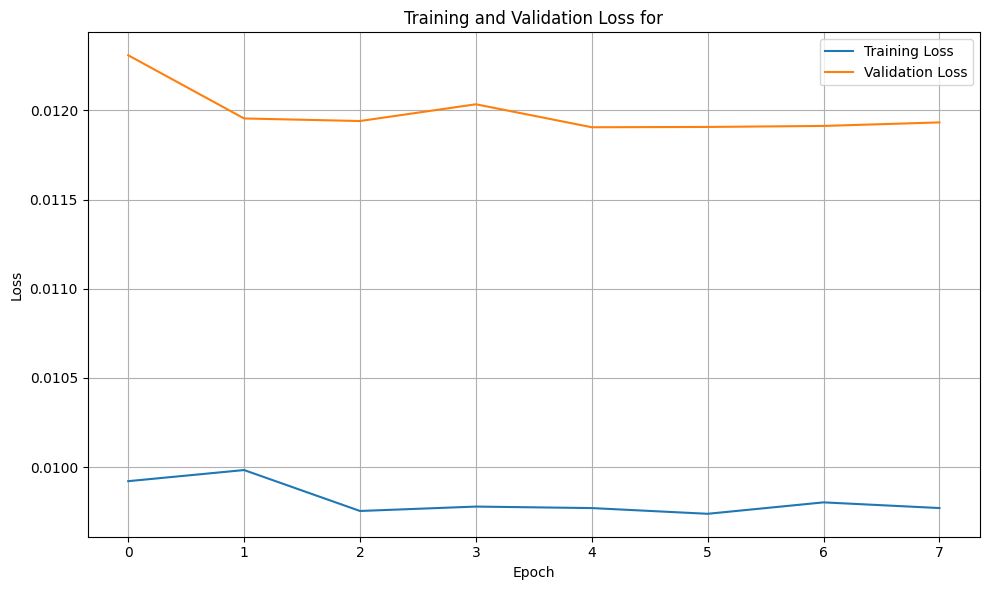

In [ ]:
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import CSVLogger
from pytorch_lightning.callbacks import ModelCheckpoint, EarlyStopping

cnn_model=CNNTextClassifier(vocab_size=len(vocab), embed_dim=100, num_filters=64, filter_sizes=[3, 3, 3], output_dim=1)
# Setup logger
logger = CSVLogger(save_dir="logs", name="cnn_model")

# Setup early stopping callback
early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=3,
    mode='min'
)

# Setup checkpoint callback
checkpoint_callback = ModelCheckpoint(
    monitor='val_loss',
    dirpath='checkpoints',
    filename='best_model-{epoch:02d}-{val_loss:.2f}',
    save_top_k=1,
    mode='min'
)

# Setup Trainer
trainer = Trainer(
    max_epochs=200,
    devices=1 if torch.cuda.is_available() else "auto",
    logger=logger,
    callbacks=[early_stopping_callback, checkpoint_callback]
)

trainer.fit(cnn_model, datamodule=data_module)

# Save the model
trainer.save_checkpoint("cnn_model.ckpt")
load_and_plot_metrics(trainer.logger.log_dir)



In [ ]:
best_model_path = checkpoint_callback.best_model_path
print(f"Best model saved at: {best_model_path}")
# Re-instantiate the model class (with the same architecture as before)
cnn_model = CNNTextClassifier.load_from_checkpoint(best_model_path, vocab_size=len(vocab), embed_dim=100, num_filters=64, filter_sizes=[3, 3, 3], output_dim=1)
# Setup logger (in case you want to log the test results too)
logger = CSVLogger(save_dir="logs", name="cnn_model")
# Setup Trainer for evaluation (you can use a reduced number of devices for testing)
trainer = Trainer(logger=logger, devices=1 if torch.cuda.is_available() else "auto")
# Run the model on the test set
trainer.test(cnn_model, datamodule=data_module)


Best model saved at: /content/checkpoints/best_model-epoch=04-val_loss=0.01-v1.ckpt


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Testing: |          | 0/? [00:00<?, ?it/s]

Mean Squared Error: 0.0001892124128062278
Mean Absolute Error: 0.01375544909387827


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_mae          │    0.01375544909387827    │
│         test_mse          │   0.0001892124128062278   │
└───────────────────────────┴───────────────────────────┘

[{'test_mse': 0.0001892124128062278, 'test_mae': 0.01375544909387827}]

### Predictions

In [ ]:
phrase ="Chelsea agree transfer, player on loan to Reading."
predicted_prob = predict_probability(cnn_model, phrase, vocab)
print(f"Predicted probability: {predicted_prob:.4f}")

[[28.855225]]
Predicted probability: 1.0000


In [ ]:
phrase ="Manchester City completed a season-long loan deal with Crewe Alexandra."
predicted_prob = predict_probability(cnn_model, phrase, vocab)
print(f"Predicted probability: {predicted_prob:.4f}")

[[23.661358]]
Predicted probability: 1.0000


In [ ]:
phrase ="Ankle injury operation is needed"
predicted_prob = predict_probability(cnn_model, phrase, vocab)
print(f"Predicted probability: {predicted_prob:.4f}")

[[-14.61409]]
Predicted probability: 0.0000


In [187]:
# Assuming you have a trained RNN model, a vocab dictionary, and optionally a scaler
phrase ="Liverpool announces new deal for Salah"
predicted_prob = predict_probability(cnn_model, phrase, vocab)
print(f"Predicted probability: {predicted_prob:.4f}")

[[26.339096]]
Predicted probability: 1.0000
